<a href="https://colab.research.google.com/github/huzhijiang/CubiCasa5k/blob/master/huzhj_cubicasa5k_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone code

In [1]:
!git clone https://github.com/huzhijiang/CubiCasa5k.git

Cloning into 'CubiCasa5k'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 99 (delta 41), reused 25 (delta 25), pack-reused 26 (from 2)
Receiving objects: 100% (99/99), 63.72 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
%cd CubiCasa5k

/content/CubiCasa5k


In [ ]:
!git reset --hard HEAD
!git clean -xffd
!git pull

HEAD is now at cbfce72 Update post_prosessing.py for initial run on colab
Removing floortrans/__pycache__/
Removing floortrans/loaders/__pycache__/
Removing floortrans/models/__pycache__/
Removing model_best_val_loss_var.pkl
Updating cbfce72..47404f5
Fast-forward
 floortrans/plotting.py | 15 ++++++++-------
 1 file changed, 8 insertions(+), 7 deletions(-)


In [3]:
%cd data

/content/CubiCasa5k/data


## Get Dataset method 1: From origin

In [ ]:
!wget https://zenodo.org/records/2613548/files/cubicasa5k.zip?download=1 -O cubi.zip

--2025-03-12 12:55:50--  https://zenodo.org/records/2613548/files/cubicasa5k.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5469495706 (5.1G) [application/octet-stream]
Saving to: ‘cubi.zip’

cubi.zip            100%[===================>]   5.09G  8.06MB/s    in 11m 37s 

2025-03-12 13:07:27 (7.49 MB/s) - ‘cubi.zip’ saved [5469495706/5469495706]



## Get Dataset method 2: From my google drive (optional)

In [4]:
!cp /content/drive/MyDrive/Colab\ Notebooks/cubi.zip ./

## Prepare Dataset

In [5]:
!unzip -q cubi.zip

In [6]:
%cd ..

/content/CubiCasa5k


## Get Pretrained Weights (only in my google drive)

In [7]:
!cp /content/drive/MyDrive/Colab\ Notebooks/model_best_val_loss_var.pkl ./

## Create LMDB For Fast Accessing of Dataset

In [8]:
!pip install lmdb svgpathtools tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.0 MB/s eta 0:00:00


In [9]:
!python create_lmdb.py --txt test.txt

 11% 45/400 [00:36<06:20,  1.07s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 27% 109/400 [01:21<03:39,  1.33it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 34% 134/400 [01:37<03:27,  1.28it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 46% 184/400 [02:13<02:41,  1.33it/s]libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
 52% 206/400 [02:31<02:21,  1.37it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 63% 252/400 [03:05<01:04,  2.28it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 67% 268/400 [03:18<01:46,  1.24it/s]libpng warning: iCCP: known incorrect sRGB

## Validation (optional)

In [ ]:
!python eval.py --weights model_best_val_loss_var.pkl

/content/CubiCasa5k/eval.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.weights)
/content/CubiCasa5k/floortrans/models/hg_furukawa_origina

## Prepare Data and Model For Showcase

In [10]:
%matplotlib inline

from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from floortrans.models import get_model
from floortrans.loaders import FloorplanSVG, DictToTensor, Compose, RotateNTurns
from floortrans.plotting import segmentation_plot, polygons_to_image, draw_junction_from_dict, discrete_cmap
discrete_cmap()
from floortrans.post_prosessing import split_prediction, get_polygons, split_validation
from mpl_toolkits.axes_grid1 import AxesGrid

rot = RotateNTurns()
room_classes = ["Background", "Outdoor", "Wall", "Kitchen", "Living Room" ,"Bed Room", "Bath", "Entry", "Railing", "Storage", "Garage", "Undefined"]
icon_classes = ["No Icon", "Window", "Door", "Closet", "Electrical Applience" ,"Toilet", "Sink", "Sauna Bench", "Fire Place", "Bathtub", "Chimney"]

data_folder = 'data/cubicasa5k/'
data_file = 'test.txt'
normal_set = FloorplanSVG(data_folder, data_file, format='txt', original_size=True)
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)
# Setup Model
model = get_model('hg_furukawa_original', 51)

n_classes = 44
split = [21, 12, 11]
model.conv4_ = torch.nn.Conv2d(256, n_classes, bias=True, kernel_size=1)
model.upsample = torch.nn.ConvTranspose2d(n_classes, n_classes, kernel_size=4, stride=4)
checkpoint = torch.load('model_best_val_loss_var.pkl')

model.load_state_dict(checkpoint['model_state'])
model.eval()
model.cuda()
print("Model loaded.")

/content/CubiCasa5k/floortrans/models/hg_furukawa_original.py:236: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('floortrans/models/model_14

Model loaded.


## Show Source Image

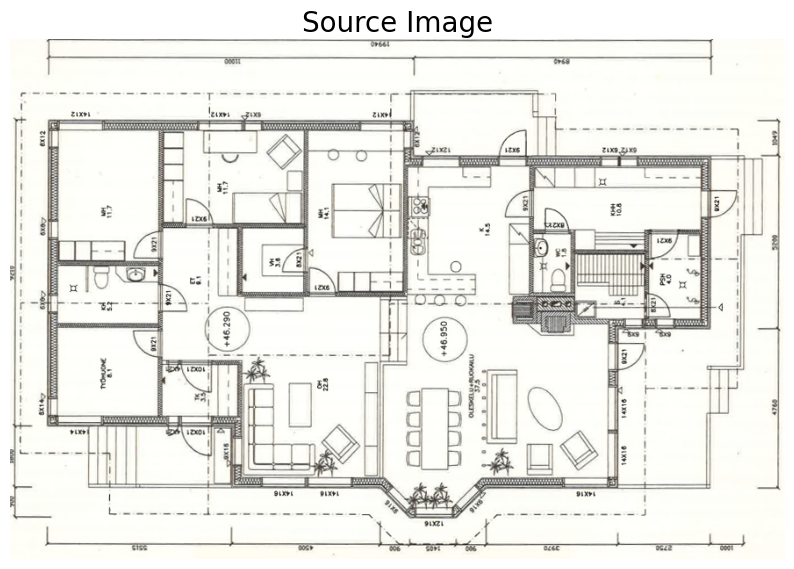

In [11]:
val = next(data_iter)
junctions = val['heatmaps']
folder = val['folder'][0]
image = val['image'].cuda() # Returns a copy of this object in CUDA memory. If this object is already in CUDA memory and on the correct device, then no copy is performed and the original object is returned.
label = val['label']

# x = np.zeros((3, 4, 5))
# np.moveaxis(x, 0, -1).shape
# (4, 5, 3)
np_img = np.moveaxis(image[0].cpu().data.numpy(), 0, -1) / 2 + 0.5 # huzhj: swap x and y axis and zoom out a little bit

plt.figure(figsize=(10,10)) # huzhj: Width, height in inches.
plt.title('Source Image', fontsize=20)
plt.axis('off')
plt.imshow(np_img)
plt.show()

## The Ground Truth

In [12]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = data_folder+folder+"model.svg", width=800)

## Parsed Labels In Ground Truth



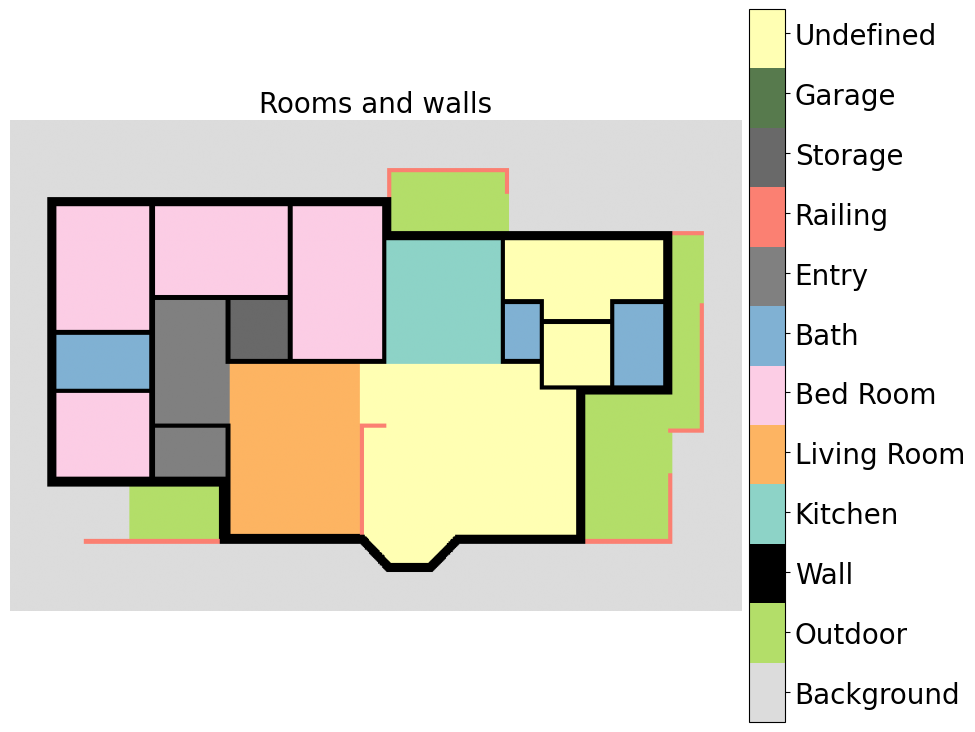

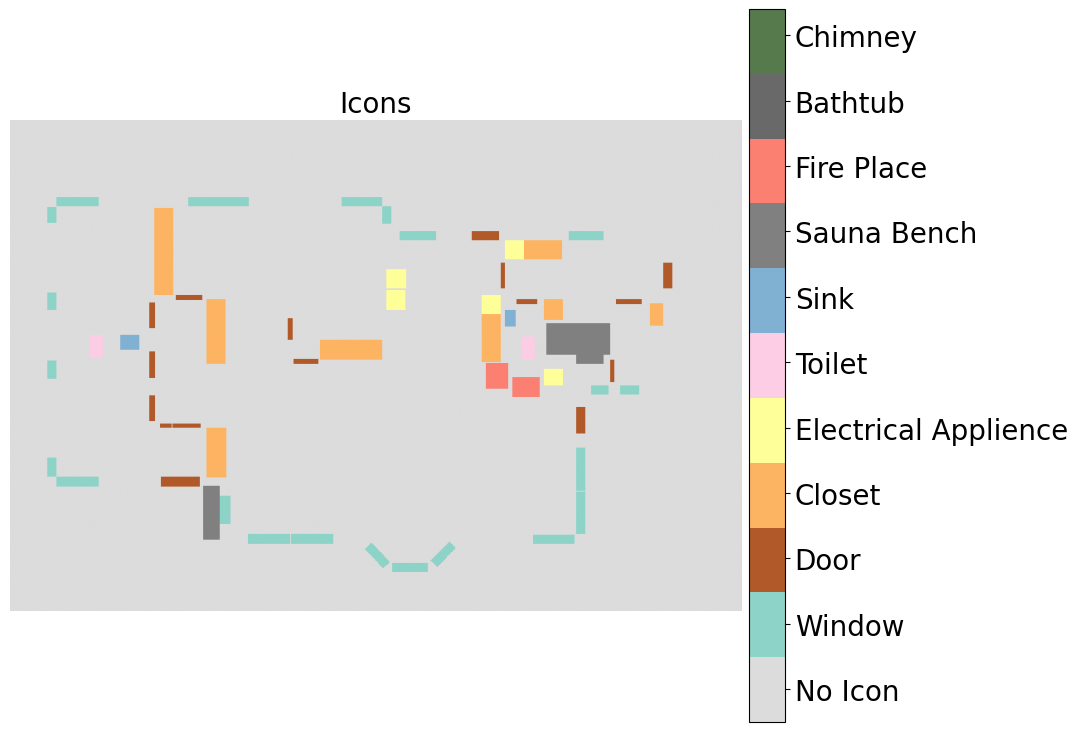

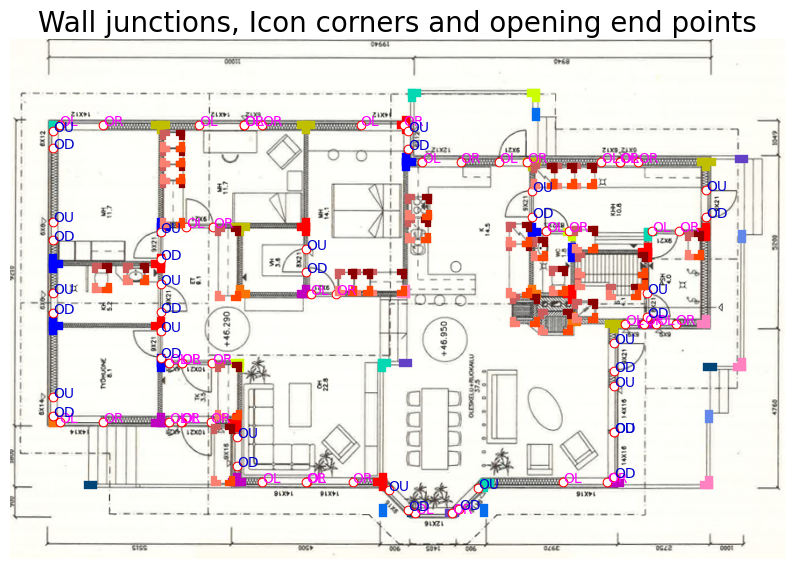

In [13]:
label_np = label.data.numpy()[0]
plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Rooms and walls', fontsize=20)
ax.axis('off')
n_rooms = 12
rseg = ax.imshow(label_np[0], cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Icons', fontsize=20)
ax.axis('off')
n_icons = 11
iseg = ax.imshow(label_np[1], cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Wall junctions, Icon corners and opening end points', fontsize=20)
ax.axis('off')
ax.imshow(np_img)
h, w, _ = np_img.shape
draw_junction_from_dict(junctions, w, h, size=0.3, fontsize=10)
plt.show()

## Prediction

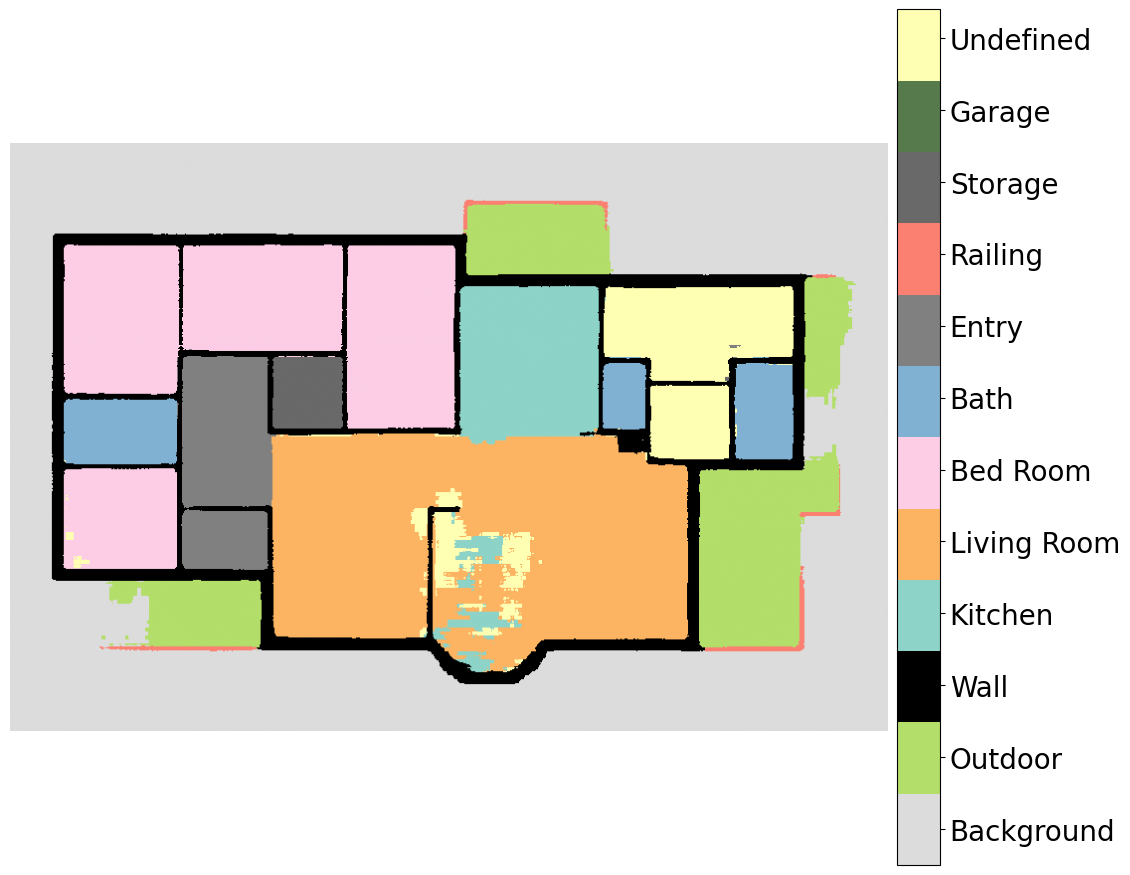

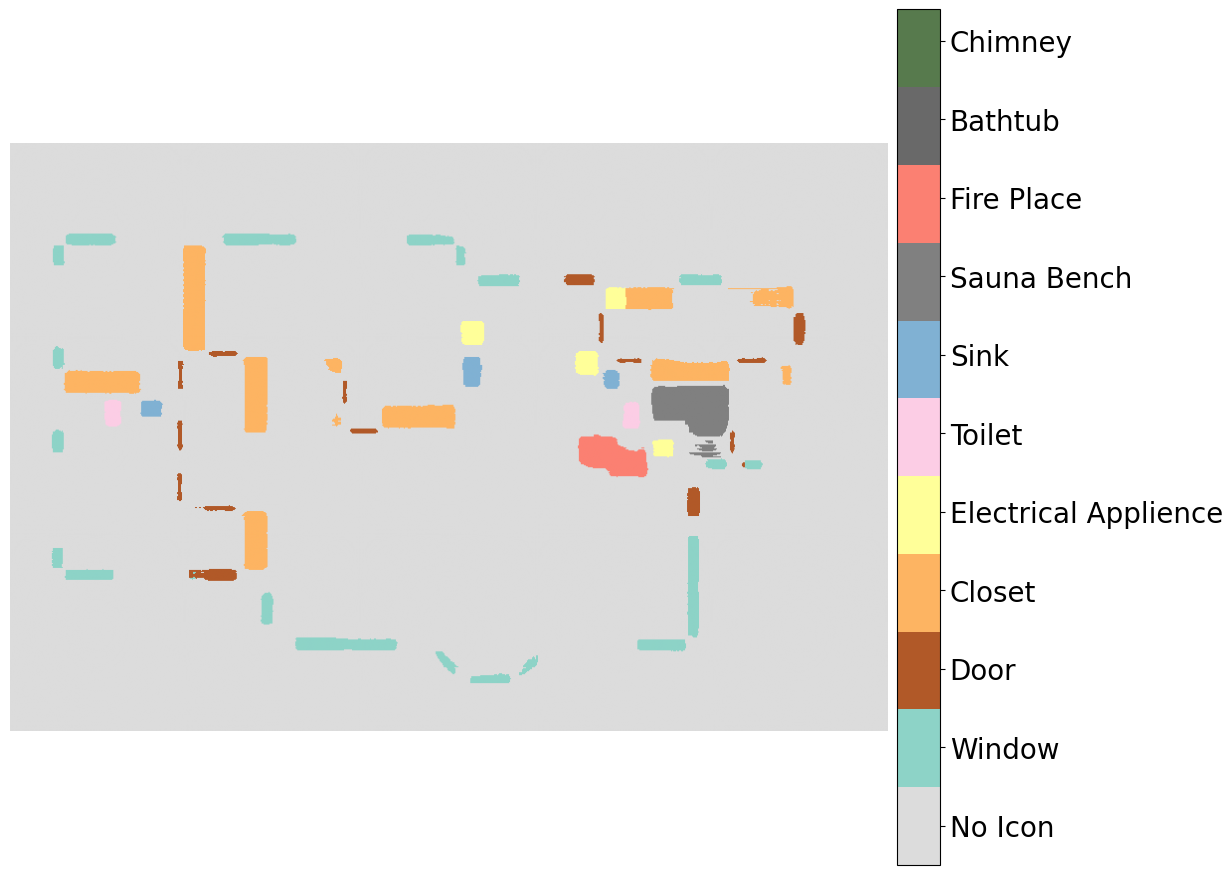

In [14]:
with torch.no_grad():
    height = label_np.shape[1]
    width = label_np.shape[2]
    img_size = (height, width)

    rotations = [(0, 0), (1, -1), (2, 2), (-1, 1)]
    pred_count = len(rotations)
    prediction = torch.zeros([pred_count, n_classes, height, width])
    for i, r in enumerate(rotations):
        forward, back = r
        # We rotate first the image
        rot_image = rot(image, 'tensor', forward)
        pred = model(rot_image)
        # We rotate prediction back
        pred = rot(pred, 'tensor', back)
        # We fix heatmaps
        pred = rot(pred, 'points', back)
        # We make sure the size is correct
        pred = F.interpolate(pred, size=(height, width), mode='bilinear', align_corners=True)
        # We add the prediction to output
        prediction[i] = pred[0]

prediction = torch.mean(prediction, 0, True)
rooms_label = label_np[0]
icons_label = label_np[1]

rooms_pred = F.softmax(prediction[0, 21:21+12], 0).cpu().data.numpy()
rooms_pred = np.argmax(rooms_pred, axis=0)

icons_pred = F.softmax(prediction[0, 21+12:], 0).cpu().data.numpy()
icons_pred = np.argmax(icons_pred, axis=0)

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(rooms_pred, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(icons_pred, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

## Post-processed Polygons From Prediction

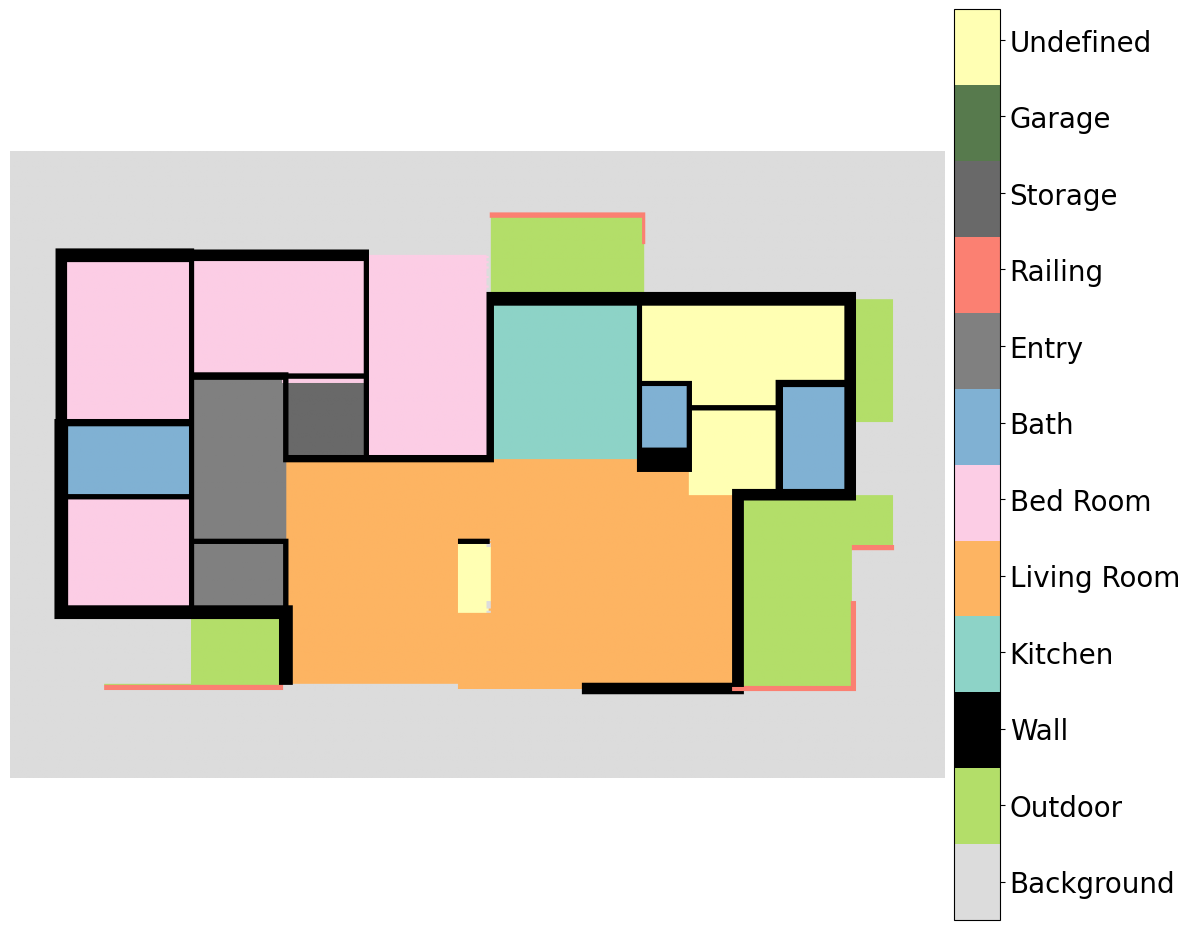

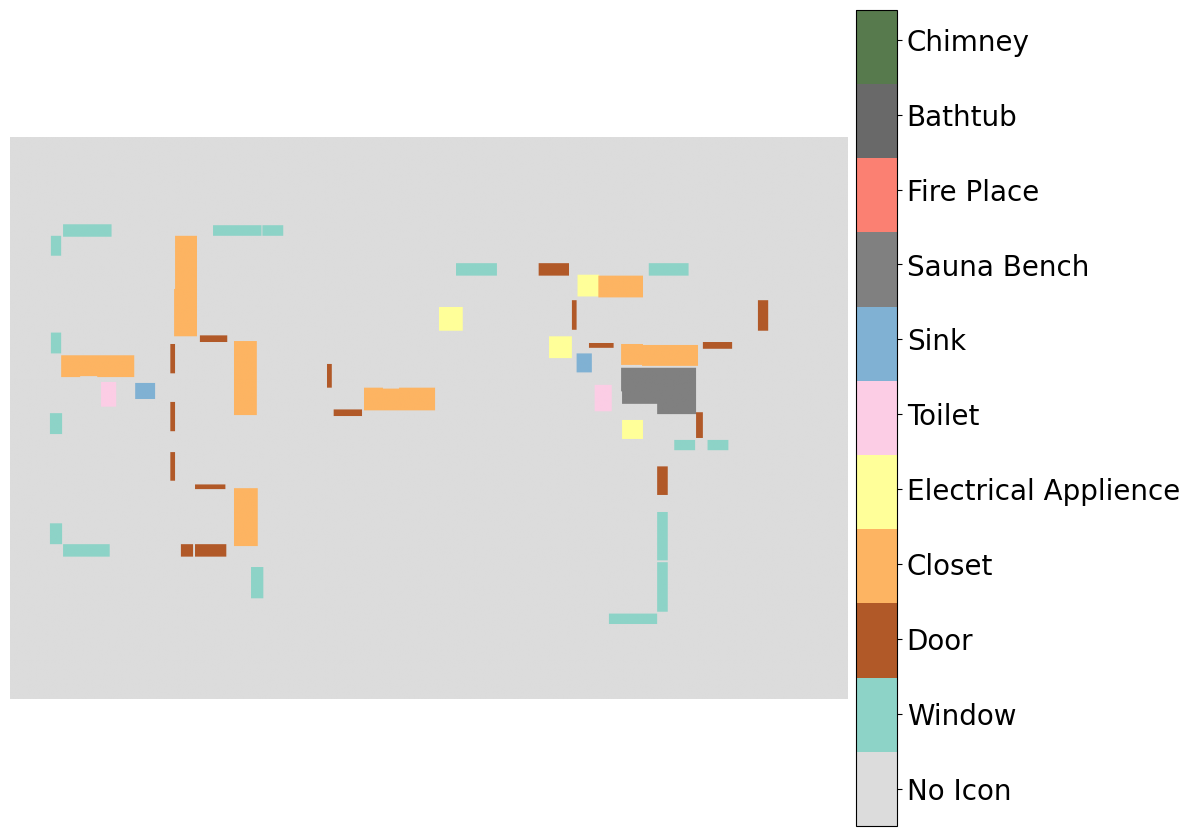

In [15]:
heatmaps, rooms, icons = split_prediction(prediction, img_size, split)
polygons, types, room_polygons, room_types = get_polygons((heatmaps, rooms, icons), 0.2, [1, 2])

pol_room_seg, pol_icon_seg = polygons_to_image(polygons, types, room_polygons, room_types, height, width)

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(pol_room_seg, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(pol_icon_seg, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.tight_layout()
plt.show()

## Exporting DXF (file not shown)

In [16]:
!pip install ezdxf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.5 MB/s eta 0:00:00


In [ ]:
from shapely.geometry import Polygon
from shapely.geometry import mapping
from shapely.geometry.collection import GeometryCollection
import ezdxf
import ezdxf.addons.geo

doc = ezdxf.new()
msp = doc.modelspace()

for item in room_polygons:
    print("s")
    print(item)
    print("ts")
    print(type(item))
    if isinstance(item, GeometryCollection): # huzhj: why we have this type of objs?
        for sub_item in list(item.geoms):
            geoproxy = ezdxf.addons.geo.GeoProxy.parse(mapping(sub_item))
            # Use LWPOLYLINE instead of hatch.
            for entity in geoproxy.to_dxf_entities(polygon=2):
                msp.add_entity(entity)
    else:
        #pass
        geoproxy = ezdxf.addons.geo.GeoProxy.parse(mapping(item))
        # Use LWPOLYLINE instead of hatch.
        for entity in geoproxy.to_dxf_entities(polygon=2):
            msp.add_entity(entity)

doc.saveas("./test3.dxf")


## Export DXF (take2)

In [17]:
import ezdxf
from shapely.geometry import (
    Polygon,
    MultiPolygon,
    GeometryCollection,
    LineString,
    LinearRing,
    Point
)

def export_shapely_to_dxf(geometries, filename, layer="GEOMETRY"):
    """
    将一组 Shapely 几何对象导出为 DXF 文件

    参数：
        geometries: list of shapely.geometry
            需要导出的几何对象列表（支持 Polygon/MultiPolygon/GeometryCollection/LineString/Point）
        filename: str
            输出的 DXF 文件名（例如："output.dxf"）
        layer: str
            指定所有几何对象放置的图层（默认为 "GEOMETRY"）
    """
    # 创建 DXF 文档 (AutoCAD 2010 格式)
    doc = ezdxf.new("R2010")
    msp = doc.modelspace()

    # 递归处理几何对象的函数
    def process_geometry(geom):
        """处理单个几何对象并添加到模型空间"""
        if geom.is_empty:
            return

        geom_type = geom.geom_type

        # 处理多边形
        if geom_type == "Polygon":
            _add_polygon(geom)

        # 处理多部件多边形
        elif geom_type == "MultiPolygon":
            for poly in geom.geoms:
                _add_polygon(poly)

        # 处理几何集合（递归处理子元素）
        elif geom_type == "GeometryCollection":
            for sub_geom in geom.geoms:
                process_geometry(sub_geom)

        # 处理线状几何
        elif geom_type in ("LineString", "LinearRing"):
            _add_linestring(geom)

        # 处理点
        elif geom_type == "Point":
            _add_point(geom)

        # 其他未支持类型提示
        else:
            print(f"警告：跳过未支持的几何类型 {geom_type}")

    # 处理多边形（含孔洞）
    def _add_polygon(polygon):
        """添加多边形及其孔洞"""
        # 外边界
        exterior = polygon.exterior
        msp.add_lwpolyline(
            _clean_coords(exterior.coords),
            close=True,
            dxfattribs={"layer": layer, "color": 1}
        )

        # 内部孔洞
        for interior in polygon.interiors:
            msp.add_lwpolyline(
                _clean_coords(interior.coords),
                close=True,
                dxfattribs={"layer": layer, "color": 2}
            )

    # 处理线状几何
    def _add_linestring(line):
        """添加线状几何（自动处理闭合）"""
        is_closed = line.geom_type == "LinearRing" or line.is_closed
        msp.add_lwpolyline(
            _clean_coords(line.coords),
            close=is_closed,
            dxfattribs={"layer": layer, "color": 3}
        )

    # 处理点
    def _add_point(point):
        """添加点"""
        msp.add_point(
            point.coords[0],
            dxfattribs={"layer": layer, "color": 4}
        )

    # 清理坐标序列（移除闭合重复点）
    def _clean_coords(coords):
        """移除闭合坐标序列的重复终点"""
        if len(coords) > 1 and coords[0] == coords[-1]:
            return list(coords)[:-1]
        return list(coords)

    # 主处理流程
    for geom in geometries:
        process_geometry(geom)

    # 保存文件
    doc.saveas(filename)



# 导出所有几何对象
export_shapely_to_dxf(
    geometries=room_polygons,
    filename="./output.dxf",
    layer="SHAPELY_OBJECTS"
)